In [117]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib notebook

from sklearn.manifold import TSNE
from sklearn.svm import SVC, OneClassSVM
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score

from sklearn.decomposition import NMF
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from scipy.sparse import hstack

import utils
import importlib
importlib.reload(utils)

double_figure = (7.2,7.2/8*5)
plt.rc('font',size=7)
plt.rc('axes',titlesize=7)
plt.rc('axes',labelsize=7)
plt.rc('xtick',labelsize=7)
plt.rc('ytick',labelsize=7)
plt.rc('legend',fontsize=7)
plt.rc('figure',titlesize=7)

In [23]:
df = pd.read_csv('docs.csv').sample(frac=1).reset_index(drop=True)
y = np.array(df['relevant'])
df.head()

,Unnamed: 0,index,PY,UT_id,authors,citation_objects,content,date,dtype,duplicated,...,relevant,scopus,source,tilength,title,uploaded,uploader_id,url,wos,ymentions
0,28,32,2008,WOS:000260396600013,"Maibach, EW, Roser-Renouf, C, Leiserowitz, A",False,The understanding that global climate change r...,NaN,NaN,False,...,0,True,NaN,93.0,Communication and Marketing As Climate Change-...,False,NaN,NaN,True,NaN
1,40,50,2015,WOS:000349507900009,"Buchanan, K, Russo, R, Anderson, B",False,With smart metering initiatives gaining increa...,NaN,NaN,False,...,0,False,NaN,62.0,The question of energy reduction: The problem(...,False,NaN,NaN,True,NaN
2,245,306,2015,WOS:000359809000012,NaN,False,"The dynamic, chaotic, intimate and social natu...",NaN,NaN,False,...,0,False,NaN,NaN,When an eco-feedback system joins the family,False,NaN,NaN,True,NaN
3,951,1153,2003,2-s2.0-0037339999,NaN,False,The evolving global energy environment is more...,NaN,NaN,False,...,0,False,NaN,NaN,Enterprise energy management: The key to the r...,False,NaN,NaN,False,NaN
4,547,657,2018,WOS:000428485100003,NaN,False,Building envelope design has gained importance...,NaN,NaN,False,...,0,False,NaN,NaN,Life cycle efficiency ratio: A new performance...,False,NaN,NaN,True,NaN


In [98]:
vec = TfidfVectorizer(
    ngram_range=(1,2),
    min_df=15, max_df=0.6, strip_accents='unicode', 
    use_idf=1,
    smooth_idf=1, sublinear_tf=1,
    stop_words="english",tokenizer=utils.tokenize
)

ab_X = vec.fit_transform(df['content'])
ab_X.shape

(1109, 1380)

## Input tuning

In [130]:
vec = TfidfVectorizer(
    ngram_range=(1,2),
    min_df=10, max_df=0.9, strip_accents='unicode', 
    use_idf=1,
    smooth_idf=1, sublinear_tf=1,
    stop_words="english",tokenizer=utils.tokenize
)


ti_X = vec.fit_transform(df['title'])
ti_X.shape

(1109, 219)

In [131]:
vec = CountVectorizer(
    ngram_range=(1,1),
    min_df=1, max_df=0.9, strip_accents='unicode', 
    stop_words="english",tokenizer=utils.tokenize
)
df['authors'] = df['authors'].fillna("")
au_X = vec.fit_transform(df['authors'])
print(au_X.shape)
vec.get_feature_names()

(1109, 402)


['abdul',
 'abdullah',
 'aberer',
 'aberle',
 'abr',
 'abrahamse',
 'ahmad',
 'ahmadi',
 'ahmed',
 'akkurt',
 'alberini',
 'albert',
 'ameer',
 'anderson',
 'ang',
 'ansari',
 'antunes',
 'apergis',
 'arzanpour',
 'asensio',
 'awata',
 'baddeley',
 'banfi',
 'barreto',
 'bartram',
 'bartusch',
 'bastien',
 'basu',
 'becerik',
 'belusko',
 'bhattacharya',
 'biermayr',
 'blocker',
 'blumsack',
 'bm',
 'boehm',
 'bogliacino',
 'boza',
 'bradley',
 'brady',
 'braham',
 'brata',
 'brotman',
 'brownson',
 'bruun',
 'buchanan',
 'bull',
 'burchell',
 'burgess',
 'camilleri',
 'capstick',
 'carrico',
 'castaldo',
 'catalao',
 'cecchi',
 'chakraborty',
 'chalvatzis',
 'chamber',
 'chao',
 'chen',
 'cheng',
 'cheung',
 'chiong',
 'chou',
 'cialdini',
 'coburn',
 'codagnone',
 'coke',
 'coleman',
 'considine',
 'cotana',
 'croson',
 'cui',
 'dadah',
 'dalen',
 'dan',
 'darby',
 'delmas',
 'denef',
 'diaz',
 'dijk',
 'ding',
 'dinh',
 'dolan',
 'dong',
 'dux',
 'ebeling',
 'egenolf',
 'eilts',
 'e

In [128]:
X = hstack([ab_X,ti_X,au_X],format="csr")
X.shape

(1109, 2001)

In [129]:
clf = MLPClassifier(
            solver='lbfgs', 
            alpha=0.001,
            hidden_layer_sizes=(10), 
            random_state=1
        )

clf.fit(X[train_index],y[train_index])
clf.score(X[test_index],y[test_index])

0.8545454545454545

In [101]:
clf = MLPClassifier(
            solver='lbfgs', 
            alpha=0.1,
            hidden_layer_sizes=(10), 
            random_state=1
        )

clf.fit(ab_X[train_index],y[train_index])
clf.score(ab_X[test_index],y[test_index])

0.8727272727272727

## Model tuning

In [4]:

from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[0.01,0.05,0.1]}
mnb = MultinomialNB()
clf = GridSearchCV(mnb,parameters)
clf.fit(X, y)
pd.DataFrame.from_dict(clf.cv_results_)

/home/max/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/max/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/max/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/max/.local/lib/python3.6/site-packages/skle

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.002018,0.000376,0.000293,0.000034,0.01,{'alpha': 0.01},0.900000,0.894595,0.883469,0.892696,0.006880,1,0.986468,0.986468,0.991892,0.988276,0.002557
1,0.001727,0.000025,0.000265,0.000002,0.05,{'alpha': 0.05},0.886486,0.894595,0.888889,0.889991,0.003402,2,0.974290,0.979702,0.982432,0.978808,0.003384
2,0.001860,0.000130,0.000308,0.000032,0.1,{'alpha': 0.1},0.878378,0.894595,0.888889,0.887286,0.006719,3,0.971583,0.972936,0.972973,0.972498,0.000647


In [5]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear',),'C':[1,5,10]}
svc = SVC()
clf = GridSearchCV(svc,parameters)
clf.fit(X, y)
pd.DataFrame.from_dict(clf.cv_results_)

/home/max/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/max/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/max/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/max/.local/lib/python3.6/site-packages/skle

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.134054,0.003621,0.064125,0.000517,1,linear,"{'C': 1, 'kernel': 'linear'}",0.902703,0.900000,0.894309,0.899008,0.003497,1,0.985115,0.979702,0.985135,0.983317,0.002556
1,0.134385,0.002288,0.065308,0.001026,5,linear,"{'C': 5, 'kernel': 'linear'}",0.902703,0.897297,0.886179,0.895401,0.006876,2,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.134341,0.002366,0.064697,0.000865,10,linear,"{'C': 10, 'kernel': 'linear'}",0.902703,0.897297,0.886179,0.895401,0.006876,2,1.000000,1.000000,1.000000,1.000000,0.000000


In [6]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'alpha':[1,0.1,0.01,0.001,0.0001],
    'hidden_layer_sizes' : [(10),(5),(10,5),(10,2),(5,5),(5,2),(50),(50,5)],
    'max_iter': [500]
}
mpl = MLPClassifier()
clf = GridSearchCV(mpl,parameters)
clf.fit(X, y)
pd.DataFrame.from_dict(clf.cv_results_)

/home/max/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/max/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/max/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/max/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_sizes,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.419035,0.092124,0.000785,0.000002,1,10,500,"{'alpha': 1, 'hidden_layer_sizes': 10, 'max_it...",0.894595,0.900000,0.888889,0.894500,0.004536,23,0.981055,0.970230,0.967568,0.972951,0.005833
1,2.659173,0.133157,0.000641,0.000010,1,5,500,"{'alpha': 1, 'hidden_layer_sizes': 5, 'max_ite...",0.891892,0.886486,0.891599,0.889991,0.002483,29,0.982409,0.952639,0.971622,0.968890,0.012306
2,2.959410,0.659569,0.000897,0.000021,1,"(10, 5)",500,"{'alpha': 1, 'hidden_layer_sizes': (10, 5), 'm...",0.905405,0.900000,0.894309,0.899910,0.004530,6,1.000000,1.000000,0.998649,0.999550,0.000637
3,4.694817,1.908794,0.000918,0.000031,1,"(10, 2)",500,"{'alpha': 1, 'hidden_layer_sizes': (10, 2), 'm...",0.862162,0.897297,0.897019,0.885482,0.016501,33,0.863329,1.000000,0.998649,0.953992,0.064111
4,22.168863,24.666203,0.001594,0.000360,1,"(5, 5)",500,"{'alpha': 1, 'hidden_layer_sizes': (5, 5), 'ma...",0.883784,0.894595,0.897019,0.891794,0.005754,26,1.000000,1.000000,1.000000,1.000000,0.000000
5,3.400725,2.872076,0.001263,0.000022,1,"(5, 2)",500,"{'alpha': 1, 'hidden_layer_sizes': (5, 2), 'ma...",0.886486,0.862162,0.864499,0.871055,0.010961,37,0.993234,0.863329,0.862162,0.906242,0.061515
6,6.750090,0.393631,0.003623,0.000307,1,50,500,"{'alpha': 1, 'hidden_layer_sizes': 50, 'max_it...",0.900000,0.902703,0.894309,0.899008,0.003497,11,0.981055,0.974290,0.975676,0.977007,0.002918
7,10.648912,3.311604,0.003005,0.000079,1,"(50, 5)",500,"{'alpha': 1, 'hidden_layer_sizes': (50, 5), 'm...",0.905405,0.900000,0.886179,0.897205,0.008093,16,1.000000,1.000000,0.994595,0.998198,0.002548
8,4.117309,0.330579,0.001047,0.000085,0.1,10,500,"{'alpha': 0.1, 'hidden_layer_sizes': 10, 'max_...",0.910811,0.900000,0.899729,0.903517,0.005162,1,1.000000,1.000000,0.998649,0.999550,0.000637
9,3.539356,0.156720,0.000736,0.000005,0.1,5,500,"{'alpha': 0.1, 'hidden_layer_sizes': 5, 'max_i...",0.902703,0.900000,0.897019,0.899910,0.002321,6,1.000000,1.000000,1.000000,1.000000,0.000000


/home/max/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/max/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/max/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/max/.local/lib/python3.6/site-packages/skle

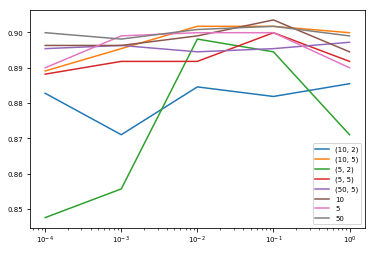

In [7]:
nn_models = pd.DataFrame.from_dict(clf.cv_results_)
nn_models['hidden_layer_sizes'] = nn_models['param_hidden_layer_sizes'].astype(str)
fig, ax = plt.subplots()
for name, group in nn_models.groupby('hidden_layer_sizes'):
    ax.plot(group['param_alpha'],group['mean_test_score'],label=name)

ax.set_xscale("log")
ax.legend()




## Model comparison

In [85]:
models = [
    {
        'title': 'SVM', 
        'model': SVC(kernel='linear',C=5,probability=True)
    },
    {
        'title':"Neural Net",
        'model': MLPClassifier(
            solver='lbfgs', 
            alpha=0.1,
            hidden_layer_sizes=(10), 
            random_state=1
        )
    },
    {
        'title': 'Naive Bayes', 
        'model': MultinomialNB(alpha=0.1)     
    }
]
for model in models:
    model['p'] = []
    model['r'] = []
    model['e'] = []
    model['i'] = []

kf = KFold(n_splits=10)
i=0
for train_index, test_index in kf.split(X):
    for model in models:
        clf = model['model']
        i+=1
        model['i'].append(i)
        #clf = SVC(kernel='rbf',probability=True)
        clf.fit(X[train_index],y[train_index])
        predictions = clf.predict(X[test_index])
        model['e'].append(clf.score(X[test_index],y[test_index]))
        # Precision
        model['p'].append(precision_score(predictions,y[test_index]))
        # Recall
        model['r'].append(recall_score(predictions,y[test_index]))
        


<IPython.core.display.Javascript object>


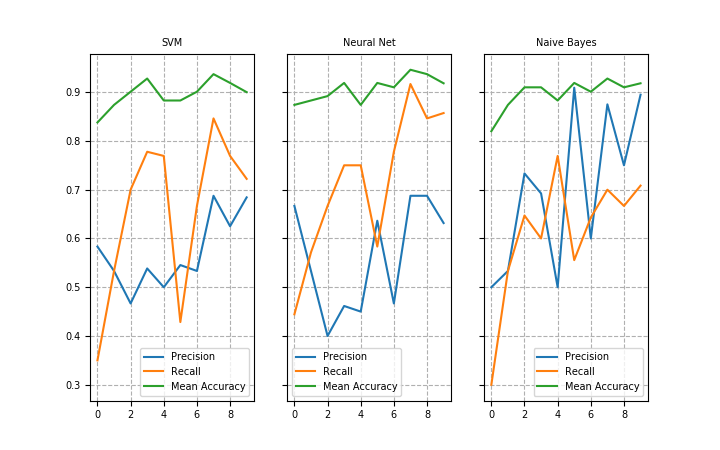

In [89]:
plt.rcParams['grid.linestyle'] = "--"
fig, axs = plt.subplots(1,3,dpi=125,figsize=double_figure,sharey=True)
for i, model in enumerate(models):
    ax = axs[i]
    ax.plot(model['p'],label="Precision")
    ax.plot(model['r'],label="Recall")
    ax.plot(model['e'],label="Mean Accuracy")
    
    ax.set_title(model['title'])
    ax.grid()
    ax.legend()

## Outlier detection

/home/max/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<BarContainer object of 1 artists>

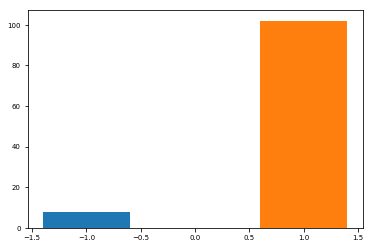

In [10]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest()
#clf = OneClassSVM(nu=0.1,kernel="rbf",gamma=0.1)
clf.fit(X[train_index])
outlying = clf.predict(X[test_index])
plt.bar(-1,len(outlying[outlying==-1]))
plt.bar(1,len(outlying[outlying==1]))

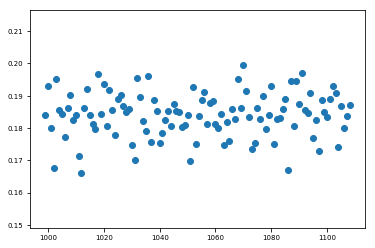

In [11]:
fig, axs = plt.subplots()
plt.scatter(test_index,clf.decision_function(X[test_index]))
plt.show()

## Simulations

/home/max/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<IPython.core.display.Javascript object>


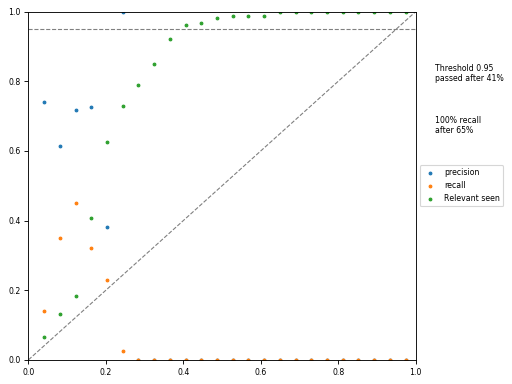

In [17]:
%matplotlib notebook
import importlib
importlib.reload(utils)
clf = MLPClassifier(
    solver='lbfgs', 
    alpha=1e-5,
    hidden_layer_sizes=(10), 
    random_state=1
)
ss = utils.ScreenSimulation(df,clf,X,y)

ss.simulate(25,"relevant_first_delay",0.95)

Traceback (most recent call last):
  File "/home/max/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/home/max/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/home/max/.local/lib/python3.6/site-packages/matplotlib/animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'
/home/max/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<IPython.core.display.Javascript object>


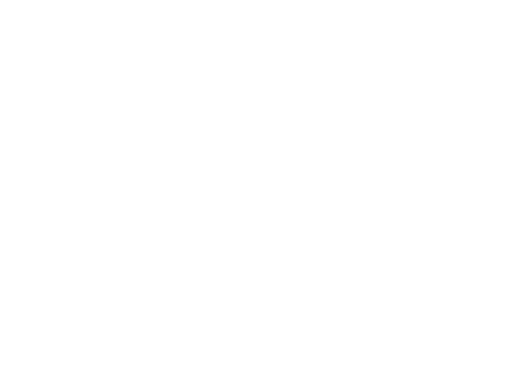

In [13]:
%matplotlib notebook
import importlib
importlib.reload(utils)
clf = MLPClassifier(
    solver='lbfgs', 
    alpha=1e-5,
    hidden_layer_sizes=(10), 
    random_state=1
)
ss = utils.ScreenSimulation(df,clf,X,y)

ss.simulate(25,"outliers_first",0.95)

In [14]:
self = ss
sort_docs=self.test.sample(1).copy().reset_index(drop=True)

AttributeError: 'DataFrame' object has no attribute 'rest_index'

In [ ]:
%matplotlib notebook
import importlib
importlib.reload(utils)
clf = MLPClassifier(
    solver='lbfgs', 
    alpha=1e-5,
    hidden_layer_sizes=(10), 
    random_state=1
)
ss = utils.ScreenSimulation(df,clf,X,y)

ss.simulate(25,"relevant_first",0.95)

In [ ]:
%matplotlib notebook
import importlib
importlib.reload(utils)
clf = SVC(kernel='linear',C=5,probability=True)
ss = utils.ScreenSimulation(df,clf,X,y)

ss.simulate(25,"relevant_first_delay",0.95)

In [ ]:
model = MultinomialNB(alpha=1)
ss = utils.ScreenSimulation(df,clf,X,y)

ss.simulate(25,"relevant_first_delay",0.95)
